In [39]:
from pdpbox import info_plots
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot

In [2]:
import pandas as pd

df = pd.read_csv("./data/oridata.csv")

In [4]:
df.head()

,scd,gender,age_grp,employee_yn,prime_yn,unit_price,category,list_in,week,holiday,price,discount_rate
0,20230124153976,F,2,Y,N,18091.0,국/김치/김/반찬/두부,NaN,5,평일,18091.0,0.000000
1,20230124155563,M,3,Y,N,4281.0,스팸/닭가슴살/소시지,NaN,5,평일,3853.0,0.099977
2,20230125158386,F,4,N,N,11481.0,만두/피자/치킨,NaN,5,평일,11481.0,0.000000
3,20230126164638,F,4,N,Y,16981.0,만두/피자/치킨,NaN,5,평일,15792.0,0.070019
4,20230125159705,M,4,N,Y,2380.1,밥/죽/면,NaN,5,평일,21909.0,0.539746


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()

df["category"] = le.fit_transform(df["category"])
df["gender"] = le.fit_transform(df["gender"])
df["age_grp"] = le.fit_transform(df["age_grp"])
df["employee_yn"] = le.fit_transform(df["employee_yn"])
df["prime_yn"] = le.fit_transform(df["prime_yn"])
df["holiday"] = le.fit_transform(df["holiday"])

In [5]:
df["list_in"] = le.fit_transform(df["list_in"])

In [6]:
df

,scd,gender,age_grp,employee_yn,prime_yn,unit_price,category,list_in,week,holiday,price,discount_rate
0,20230124153976,0,1,1,0,18091.0,1,61,5,1,18091.0,0.000000e+00
1,20230124155563,1,2,1,0,4281.0,7,61,5,1,3853.0,9.997664e-02
2,20230125158386,0,3,0,0,11481.0,4,61,5,1,11481.0,0.000000e+00
3,20230126164638,0,3,0,1,16981.0,4,61,5,1,15792.0,7.001943e-02
4,20230125159705,1,3,0,1,2380.1,6,61,5,1,21909.0,5.397462e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
45870,20230102972321,1,4,1,1,8083.0,1,61,2,1,5701.0,2.946926e-01
45871,20230102972720,0,2,0,0,15357.0,1,51,2,1,15357.0,-2.220446e-16
45872,20230101964953,0,3,0,0,15357.0,1,51,1,0,15357.0,-2.220446e-16
45873,20230101970142,1,3,1,1,3481.0,3,50,1,0,2807.0,1.936225e-01


In [7]:
from xgboost import XGBClassifier

In [13]:
X.dropna(inplace=True)

In [75]:
X = df.drop("prime_yn", axis=1)
y = df["prime_yn"]

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

In [78]:
model = XGBClassifier()

In [79]:
X.drop(["scd", "list_in"], axis=1, inplace=True)

KeyError: "['scd'] not found in axis"

In [80]:
model.fit(X_train, y_train)

[01:08:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
from pdpbox import info_plots

In [82]:
len(df)

45852

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45852 entries, 0 to 45874
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age_grp        45852 non-null  int64  
 1   prime_yn       45852 non-null  int32  
 2   unit_price     45852 non-null  float64
 3   category       45852 non-null  int32  
 4   list_in        45852 non-null  int32  
 5   week           45852 non-null  int64  
 6   holiday        45852 non-null  int32  
 7   price          45852 non-null  float64
 8   discount_rate  45852 non-null  float64
dtypes: float64(3), int32(4), int64(2)
memory usage: 4.0 MB


In [84]:
len(y)

45852

In [85]:
target = df.columns[4]

In [86]:
feature_names = df.columns  # Replace with the actual feature names
X_valid = df[feature_names]

# Create the PDP plot
pdp_feature = '<feature_name>'  # Replace with the feature name for which you want to create the PDP plot
pdp_data = pdp_isolate(model=model, dataset=X_valid, model_features=feature_names, feature=pdp_feature)

pdp_plot(pdp_data, pdp_feature)

ValueError: feature does not exist: <feature_name>

In [87]:
df

,age_grp,prime_yn,unit_price,category,list_in,week,holiday,price,discount_rate
0,1,0,18091.0,1,61,5,1,18091.0,0.000000e+00
1,2,0,4281.0,7,61,5,1,3853.0,9.997664e-02
2,3,0,11481.0,4,61,5,1,11481.0,0.000000e+00
3,3,1,16981.0,4,61,5,1,15792.0,7.001943e-02
4,3,1,2380.1,6,61,5,1,21909.0,5.397462e-01
...,...,...,...,...,...,...,...,...,...
45870,4,1,8083.0,1,61,2,1,5701.0,2.946926e-01
45871,2,0,15357.0,1,51,2,1,15357.0,-2.220446e-16
45872,3,0,15357.0,1,51,1,0,15357.0,-2.220446e-16
45873,3,1,3481.0,3,50,1,0,2807.0,1.936225e-01


In [88]:
df.dropna(inplace=True)

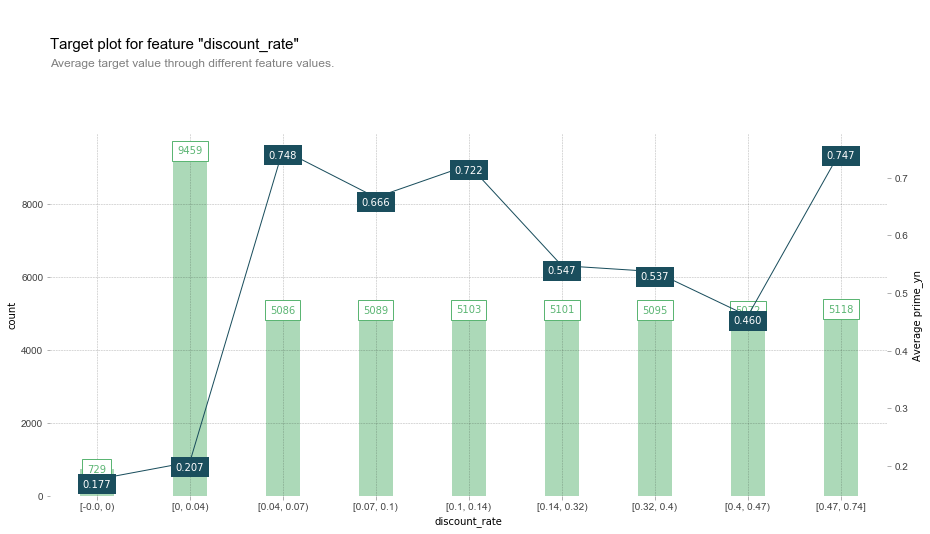

In [89]:
fig, axes, summary_df = info_plots.target_plot(
    df=df,
    feature="discount_rate",
    feature_name="discount_rate",
    target="prime_yn"
)

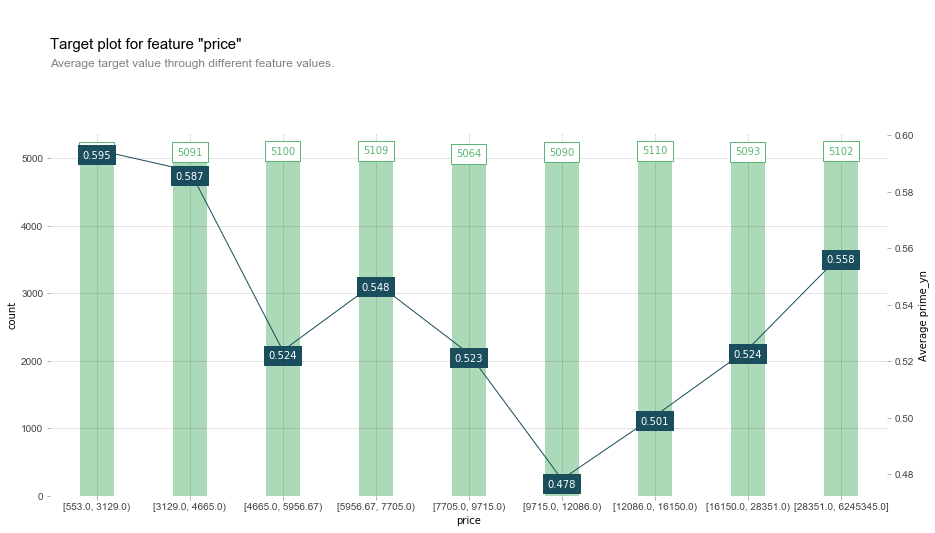

In [90]:
fig, axes, summary_df = info_plots.target_plot(
    df=df,
    feature="price",
    feature_name="price",
    target="prime_yn"
)

In [91]:
X

,age_grp,unit_price,category,list_in,week,holiday,price,discount_rate
0,1,18091.0,1,61,5,1,18091.0,0.000000e+00
1,2,4281.0,7,61,5,1,3853.0,9.997664e-02
2,3,11481.0,4,61,5,1,11481.0,0.000000e+00
3,3,16981.0,4,61,5,1,15792.0,7.001943e-02
4,3,2380.1,6,61,5,1,21909.0,5.397462e-01
...,...,...,...,...,...,...,...,...
45870,4,8083.0,1,61,2,1,5701.0,2.946926e-01
45871,2,15357.0,1,51,2,1,15357.0,-2.220446e-16
45872,3,15357.0,1,51,1,0,15357.0,-2.220446e-16
45873,3,3481.0,3,50,1,0,2807.0,1.936225e-01


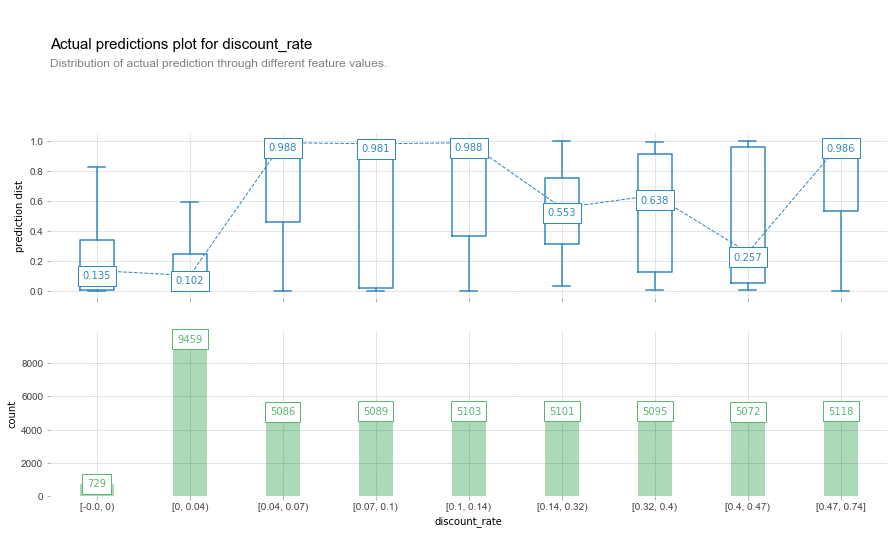

In [92]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model,
    X=df.drop("prime_yn", axis=1),
    feature="discount_rate",
    feature_name="discount_rate",
    predict_kwds={}
)

In [93]:
X_train

,age_grp,unit_price,category,list_in,week,holiday,price,discount_rate
41699,4,2262.0,9,61,5,1,3286.0,0.515768
10392,2,10481.0,11,61,6,1,8460.0,0.192825
10278,3,9860.0,4,26,5,1,9860.0,0.000000
7578,3,7920.5,9,61,5,1,4051.0,0.488542
34432,5,9961.0,1,26,5,1,9961.0,0.000000
...,...,...,...,...,...,...,...,...
33594,4,2980.5,6,61,2,1,5961.0,0.000000
10761,2,6481.0,6,61,5,1,10736.0,0.171733
39166,2,39373.0,4,8,2,1,37694.0,0.042643
32131,2,12583.0,1,61,1,0,11360.0,0.097195


In [94]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32096 entries, 41699 to 24549
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age_grp        32096 non-null  int64  
 1   unit_price     32096 non-null  float64
 2   category       32096 non-null  int32  
 3   list_in        32096 non-null  int32  
 4   week           32096 non-null  int64  
 5   holiday        32096 non-null  int32  
 6   price          32096 non-null  float64
 7   discount_rate  32096 non-null  float64
dtypes: float64(3), int32(3), int64(2)
memory usage: 1.8 MB


In [95]:
X

,age_grp,unit_price,category,list_in,week,holiday,price,discount_rate
0,1,18091.0,1,61,5,1,18091.0,0.000000e+00
1,2,4281.0,7,61,5,1,3853.0,9.997664e-02
2,3,11481.0,4,61,5,1,11481.0,0.000000e+00
3,3,16981.0,4,61,5,1,15792.0,7.001943e-02
4,3,2380.1,6,61,5,1,21909.0,5.397462e-01
...,...,...,...,...,...,...,...,...
45870,4,8083.0,1,61,2,1,5701.0,2.946926e-01
45871,2,15357.0,1,51,2,1,15357.0,-2.220446e-16
45872,3,15357.0,1,51,1,0,15357.0,-2.220446e-16
45873,3,3481.0,3,50,1,0,2807.0,1.936225e-01


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45852 entries, 0 to 45874
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age_grp        45852 non-null  int64  
 1   prime_yn       45852 non-null  int32  
 2   unit_price     45852 non-null  float64
 3   category       45852 non-null  int32  
 4   list_in        45852 non-null  int32  
 5   week           45852 non-null  int64  
 6   holiday        45852 non-null  int32  
 7   price          45852 non-null  float64
 8   discount_rate  45852 non-null  float64
dtypes: float64(3), int32(4), int64(2)
memory usage: 2.8 MB


In [97]:
df.drop(["scd", "gender", "employee_yn"], axis=1, inplace=True)

KeyError: "['scd' 'gender' 'employee_yn'] not found in axis"

In [98]:
pdp_gc = pdp_isolate(
    model=model,
    dataset=df,
    model_features=X,
    feature="discount_rate"
)

fig, axes = pdp_plot(
    pdp_gc,
    "discount_rate",
    plot_lines=False,
    frac_to_plot=0.5,
    plot_pts_dist=True
)

ValueError: Boolean array expected for the condition, not int64

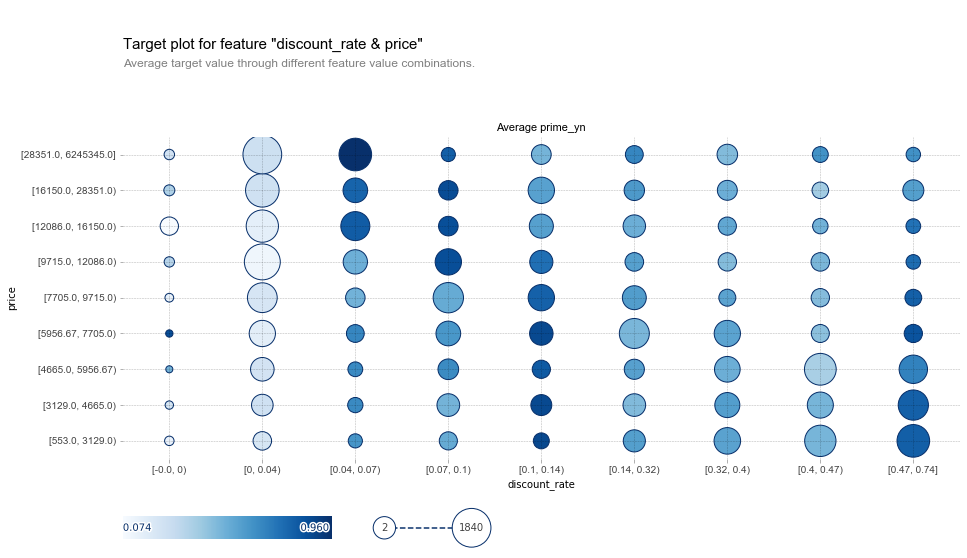

In [36]:
fig, axes, summary_df = info_plots.target_plot_interact(
    df=df,
    features=["discount_rate", "price"],
    feature_names=["discount_rate", "price"],
    target="prime_yn"
)

In [45]:
X.drop(["employee_yn", "gender"], axis=1, inplace=True)

In [47]:
pdp_interaction = pdp_interact(
    model=model,
    dataset=df,
    model_features=X,
    features=["discount_rate", "price"]
)

fig, axes = pdp_interact_plot(
    pdp_interact_out=pdp_interaction,
    feature_names=["discount_rate", "price"],
    plot_type="contour",
    x_quantile=True,
    plot_pdp=True
)

ValueError: Boolean array expected for the condition, not int64

In [48]:
pdp_bp = pdp_isolate(
    model=model,
    dataset=df,
    model_features=X,
    feature="discount_rate"
)

fig, axes = pdp_plot(pdp_bp,
                         "discount_rate",
                         plot_lines=False,
                         frac_to_plot=0.5,
                         plot_pts_dist=True
)

ValueError: Boolean array expected for the condition, not int64

In [49]:
X_train

,scd,gender,age_grp,employee_yn,unit_price,category,list_in,week,holiday,price,discount_rate
3098,20230128187097,0,2,1,1881.0,9,61,5,0,1427.0,0.241361
27224,20230115109131,1,3,1,4936.0,6,61,3,0,9871.0,0.000101
36057,20230102975345,0,1,0,62438.0,6,61,2,1,34340.0,0.450014
40861,20230116122830,0,2,1,26881.0,1,8,4,1,50977.0,0.051802
37675,20230101967513,1,3,0,8481.0,6,61,1,0,9159.0,0.460028
...,...,...,...,...,...,...,...,...,...,...,...
33576,20230101969719,0,3,0,19976.0,4,61,1,0,13088.0,0.344814
10749,20230129195715,0,2,0,5481.0,1,61,5,0,8138.0,0.505078
39148,20230101972119,0,3,0,8352.0,6,61,1,0,4510.0,0.460010
32115,20230101965562,0,2,0,9481.0,3,61,1,0,4364.0,0.539711


In [54]:
import shap

idx = 10

print(X_train.iloc[idx, :])

shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

shap.force_plot(explainer.expected_value,
                shap_values[idx, :],
                X_train.iloc[idx, :])

scd              2.023012e+13
gender           1.000000e+00
age_grp          3.000000e+00
employee_yn      1.000000e+00
unit_price       4.732000e+03
category         6.000000e+00
list_in          5.600000e+01
week             4.000000e+00
holiday          1.000000e+00
price            2.563300e+04
discount_rate    9.717526e-02
Name: 40762, dtype: float64


In [55]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values, X_train)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


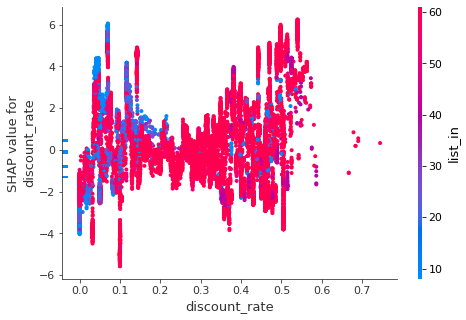

In [55]:
shap.dependence_plot("discount_rate", shap_values, X_train)

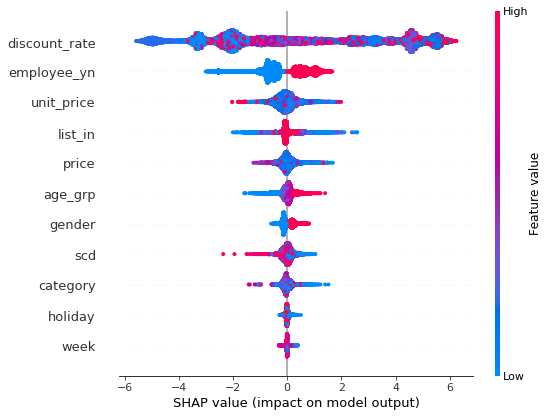

In [56]:
shap.summary_plot(shap_values, X_train)

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")